# **Project Motivation:**

# **PART I**

**This project implements K-NN from scratch as well as uses tools built into sklearn. I will also compare my algorithms with other algorithms.**

In [2]:
# importing required libraries & packages
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [16]:
# importing csv files to dfs
delivery_train = pd.read_csv("delivery_time_train_data.csv")
delivery_test = pd.read_csv("delivery_time_test_data.csv")
student_train = pd.read_csv("student_train_data.csv")
student_test = pd.read_csv("student_test_data.csv")

**Printing the first 5 rows of each dataset to inspect the nature of data**

In [17]:
# first 5 rows of delivery_train
delivery_train.head()

,Miles,Deliveries,Time
0,100,4,9.3
1,50,3,4.8
2,100,4,8.9
3,100,2,6.5
4,50,2,4.2


In [18]:
# first 5 rows of delivery_test
delivery_test.head()

,Miles,Deliveries,Time
0,50,3,4.6
1,65,2,5.5
2,80,1,6.3
3,70,1,6.2
4,70,5,8.5


In [19]:
# first 5 rows of student_train 
student_train.head()

,GPA,Age,Dropped
0,3.78,21,0
1,2.38,27,0
2,3.05,21,1
3,2.19,28,1
4,3.22,23,0


In [20]:
# first 5 rows of student_test
student_test.head()

,GPA,Age,Dropped
0,2.49,26,1
1,2.67,29,0
2,2.86,29,1
3,2.21,26,0
4,2.91,20,1


**Splitting the data into training and test set**

In [7]:
X_delivery_train = delivery_train[["Miles", "Deliveries"]]
y_delivery_train = delivery_train["Time"]

X_delivery_test = delivery_test[["Miles", "Deliveries"]]
y_delivery_test = delivery_test["Time"]

X_student_train = student_train[["GPA", "Age"]]
y_student_train = student_train["Dropped"]

X_student_test = student_test[["GPA", "Age"]]
y_student_test = student_test["Dropped"]

**Printing the shape of input and output data for the training and test sets**

In [25]:
s = 0
for i in [X_delivery_train, y_delivery_train, X_delivery_test, y_delivery_test, X_student_train, 
          y_student_train, X_student_test, y_student_test]:
    print(i.shape)
    s += 1
    if j % 2 == 0:
        print("")

(199, 2)

(199,)

(101, 2)

(101,)

(400, 2)

(400,)

(100, 2)

(100,)



**I use the delivery data for regression: that is, miles (“Miles”) and number of deliveries (“Deliveries”) would be use an input to predict the total time it takes for a delivery truck to deliver Amazon packages. I  write a k-nearest neighbor algorithm function that learns from the training set and predicts the output or y values of given test instances. The input that the function takes include:**

•	__X_train: Pandas DataFrame or 2D NumPy array__ 

•	__y_train: Pandas Series or 1D NumPy array__ 

•	__X_test: Pandas DataFrame or 2D NumPy array__

•	__K: the number of nearest neighbors. The default value is k=5 if no k value is passed during function call.__


In [41]:
def distance_calc(train_inst, test_inst):
    distance = [(i - s) ** 2 for i, s in zip(test_inst, train_inst)]
    return sum(distance)

def knn_predict(X_train, y_train, X_test, k = 5):
    y_pred = []
    for i in range(0, len(X_test)):

        # test instance from X_test
        test_instance = X_test.iloc[i]
        dist = X_train.apply(distance_calc, test_inst = test_instance, axis = 1)

        # distance between the test instance & other entries
        dist_df = pd.DataFrame({"Distance": dist, "Y_train": y_train})
        dist_df.sort_values(by = "Distance", axis = 0, inplace = True)

        pred_val = np.mean(dist_df["Y_train"][:k])
        y_pred.append(pred_val)
    return y_pred

**Calling the knn_predict() function and pass the X_delivery_train, y_delivery_train and X_delivery_test to compute the predicted output values for the X_delivery_test set. You can reference the results using a variable, y_delivery_test_pred.**

In [27]:
y_delivery_train_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train)
y_delivery_test_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test)

**Here, I write a function that computes the mean squared error to measure the performance accuracy of my knn algorithm. The input that goes into the function is the actual output values(y) and the predicted output values (y_pred).**

In [30]:
def mse_pred(y, y_pred):
    distance = [(i - s) ** 2 for i, s in zip(y, y_pred)]
    return sum(distance) / len(distance)
mse_pred(y_delivery_test, y_delivery_test_pred)

5.150495049504952

**I then call the function to compute the mse for the test set for the delivery data. That is, use mse(y_delivery_test, y_delivery_test_pred).**

In [36]:
mse_pred(y_delivery_train, y_delivery_train_pred)

4.8921608040201

**Now, I tune the hyperparameter, k, of my algorithm. I specify a grid of hyperparameter values from k=1 to k=50. I use a for-loop, then inside the for-loop body, I use the knn_predict() function as well as the mse() function to compute the mse values for the training set and test set for different values of k in the hyperparameter grid. Finally, I plot the training and test error rates of the model versus the grid of hyperparameter values.**

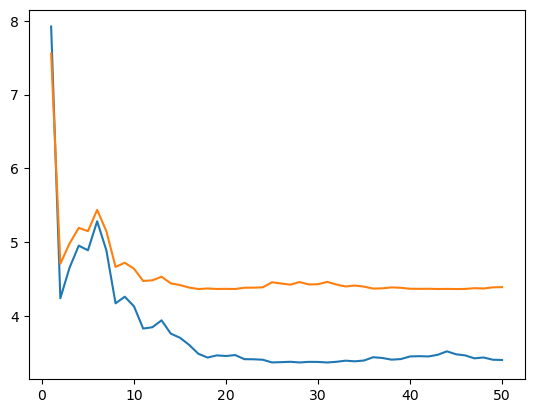

In [37]:
k_vals = [k for k in range(1,51)]
delivery_train_mse = []
delivery_test_mse = []

for k_select in k_vals: 
    delivery_train_mse.append(mse_pred(knn_predict(X_delivery_train, y_delivery_train, 
                                                   X_delivery_train, k = k_select),y_delivery_train))
    delivery_test_mse.append(mse_pred(knn_predict(X_delivery_train, y_delivery_train, 
                                                  X_delivery_test, k = k_select),y_delivery_test))

plt.plot(k_vals, delivery_train_mse, label="train_mse")
plt.plot(k_vals, delivery_test_mse, label="test_mse")
plt.show()

**Constructing and fitting a k-nearest neighbor model using the  KNeighborsRegressor() estimator in sklearn.neighbors module. I use the mean_square_error() function inside the sklearn.metrics module to compute the mse of the model on the test set.**

In [34]:
model = KNeighborsRegressor()
model.fit(X_delivery_train, y_delivery_train)
y_pred = model.predict(X_delivery_test)
mean_squared_error(y_delivery_test, y_pred)

1.093033663366337

**Using the Pipeline constructor inside the sklearn.pipeline module, I scale the X_delivery_train with the StandardScaler(), and also construct the KNeighborsRegressor() inside the Pipeline(). Then, I call the fit() method on the pipeline object to fit the model into the delivery training data. Next, I transform the X_delivery_test data using StandardScaler() and use the mean_squared_error() function inside the sklearn.metrics module to compute the mse of the model on the test set.**

In [38]:
pc = Pipeline([('scaler', StandardScaler()), ('KNeighbors', KNeighborsRegressor())])
pc.fit(X_delivery_train, y_delivery_train)
y_pred = pc.predict(X_delivery_test)
mean_squared_error(y_delivery_test, y_pred)

0.9748356435643569

**Using the scaled X_delivery_train and X_delivery_test data and the RandomForestRegressor constructor inside the sklearn.ensemble module to construct/fit a random forest model, I compute the mse for this model.**

In [39]:
pc = Pipeline([('scaler', StandardScaler()), ('RandomForest', RandomForestRegressor())])
pc.fit(X_delivery_train, y_delivery_train)
y_pred = pc.predict(X_delivery_test)
mean_squared_error(y_delivery_test, y_pred)

0.9502015334729691

In [40]:
ss = StandardScaler()

student_train[["GPA", "Age"]] = ss.fit_transform(student_train[["GPA", "Age"]]) 
student_test[["GPA", "Age"]] = ss.fit_transform(student_test[["GPA", "Age"]])

X_student_train = student_train[["GPA", "Age"]]
y_student_train = student_train["Dropped"]

X_student_test = student_test[["GPA", "Age"]]
y_student_test = student_test["Dropped"]

In [72]:
def distance_calc(train_inst, test_inst):
    distance = [(i - s) ** 2 for i, s in zip(test_inst, train_inst)]
    return sum(distance)

def knn_classify(X_train, y_train, X_test, k = 5):
    y_pred = []
    for i in range(0, len(X_test)):

        # grab a test instance from the X_test data
        test_instance = X_test.iloc[i]
        dist = X_train.apply(distance_calc, test_inst = test_instance, axis = 1)

        # calculate the distance between the test_instance and the rest of the possible entries
        dist_df = pd.DataFrame({"Distance": dist, "Y_train": y_train})
        dist_df.sort_values(by="Distance", axis = 0, inplace = True)

        pred_val = dist_df["Y_train"][:k].value_counts().index[0]
        y_pred.append(pred_val)
    return y_pred

In [73]:
y_student_test_pred = knn_classify(X_student_train, y_student_train, X_student_test)

**Defining a function called overall_accuracy, that computes the overall accuracy of your algorithm. I let my function compare the actual values (y) and the predicted or classified y values (y_pred), for example: overall accuracy could be computed using mean(y==y_pred)**

In [74]:
def overall_accuracy(y, y_pred):
    return(np.mean(y==y_pred))
overall_accuracy(y_student_test, y_student_test_pred)

0.72

**Using GridSearch in scikit-learn to tune the parameter of the k-nearest neighbor classifier, I then use that optimal parameter to compute the accuracy of the knn estimator on the test set.**

In [77]:
kClassifier = KNeighborsClassifier()
search = GridSearchCV(kClassifier, param_grid={"n_neighbors":[k for k in range(1,51)]})
search.fit(X_student_train, y_student_train)

kClassifier = KNeighborsClassifier(n_neighbors=search.best_params_["n_neighbors"])
kClassifier.fit(X_student_train, y_student_train)
y_student_test_pred = kClassifier.predict(X_student_test)
overall_accuracy(y_student_test, y_student_test_pred)

0.72

**Builidng another model using a Random Forest classifier and compute the accuracy score on the test set.**

In [119]:
forest = RandomForestClassifier()
forest.fit(X_student_train, y_student_train)
y_student_test_pred = forest.predict(X_student_test)
overall_accuracy(y_student_test, y_student_test_pred)

0.65

# __Part II__

# __Further Exploration - Forest Fires__

**<u> Research Question:</u> _Can we predict the extent of burned area (in hectares) in forest fires based on the given weather and environmental attributes?_**

#### __Data Preprocessing & Model Training__

In [3]:
# loading in csv
fires = pd.read_csv("forestfires.csv")

# checking for missing data
fires.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [57]:
# dropping the target variable "area" 
X = fires.drop("area", axis = 1)
y = fires["area"]

In [58]:
# splitting the test & training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
# one-hot encoding for categorical features
categorical_features = ["month", "day"]
categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

In [60]:
# defining column transformer to scale numerical feats.
numeric_features = X_train.select_dtypes(include=["float64", "int64"]).columns
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

### **KNN Regression and Hyperparameter Tuning Setup**

In [61]:
# creating KNN regressor & defining hyperparameter grid
k = 5
knn_regressor = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", KNeighborsRegressor(n_neighbors=k))]
)

# defining the hyperparameter grid for k
param_grid = {"regressor__n_neighbors": [1, 3, 5, 7, 9, 11]}

# creating the Grid Search CV object
grid_search = GridSearchCV(
    estimator=knn_regressor,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
)

In [62]:
# performing the hyperparameter search on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__n_neighbors': [1, 3, 5, 7, 9, 11]},
             scoring='neg_mean_squared_error')

### **Best Model Selection from Grid Search Results**

In [63]:
# getting the best k value and best model
best_k = grid_search.best_params_["regressor__n_neighbors"]
best_model = grid_search.best_estimator_

In [64]:
# making predictions on the test data using the best model
y_pred = best_model.predict(X_test)

In [65]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Best k value:", best_k)

Mean Squared Error: 11921.639066846787
Best k value: 11


# __Discussion__

**Yes, we can predict the extent of burned area (in hectares) in forest fires based on the given weather and environmental attributes. The best model is the K-NN regression model because of the optimal model of k with 11 neighbors was determined as the most suitable configuration.**